In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn nltk

### **importing libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **loading dataset**

In [4]:
data=pd.read_csv("combined_data.csv")
data.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


label
1    43910
0    39538
Name: count, dtype: int64


<Axes: xlabel='label'>

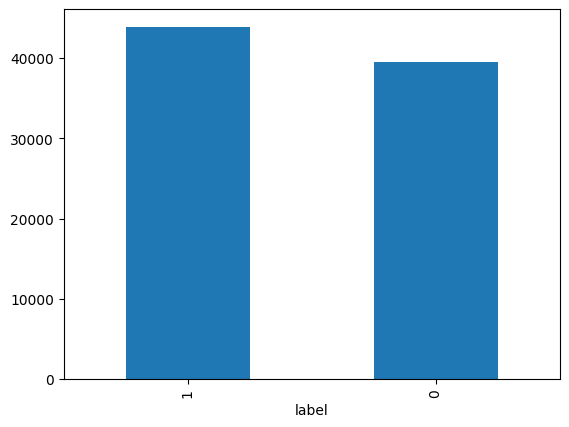

In [5]:
print(data['label'].value_counts())
data['label'].value_counts().plot(kind='bar')


>above output suggest that it is not a bias dataset

In [6]:
data["text"]

,text
0,ounce feather bowl hummingbird opec moment ala...
1,wulvob get your medircations online qnb ikud v...
2,computer connection from cnn com wednesday es...
3,university degree obtain a prosperous future m...
4,thanks for all your answers guys i know i shou...
...,...
83443,hi given a date how do i get the last date of ...
83444,now you can order software on cd or download i...
83445,dear valued member canadianpharmacy provides a...
83446,subscribe change profile contact us long term ...


### preprocessing techniques
1. By Bag of words
2. Tfdif
3. wordtovec

In [9]:
#Bag of Words
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus=[]
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## **Here we are performing some preprocessing  the data regarding**
> 1. Removing special words
> 2. Lowering every word
> 3. Stemming them all.

In [ ]:
for i in range(62373):
    spl_words=re.sub('[^a-zA-Z]'," ",data["text"][i])
    lower_words=spl_words.lower()
    words=lower_words.split()
    words=[ps.stem(i) for i in words if i not in set(stopwords.words("english"))]
    data["text"][i]=" ".join(words)
    corpus.append(data["text"][i])

In [11]:
len(corpus)

62373

In [15]:
data['text'][62372]

'bob pleas see attach file estim wellhead product month februari pleas advis preliminari estim date receiv one nom februari updat revis occur offic tomorrow howev return offic thursday thank vlt x'

In [19]:
(62372/len(data))

0.7474355287124916

In [20]:
X_train,y_train=data['text'][:62372],data['label'][:62372]
X_test,y_test=data['text'][62372:],data['label'][62372:]

In [21]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((62372,), (62372,), (21076,), (21076,))

In [23]:
arr = list(X_train)

In [24]:
len(arr)

62372

In [ ]:
corpus_test=[]
for i in range(62372,83448):
    spl_words=re.sub('[^a-zA-Z]'," ",X_test[i])
    lower_words=spl_words.lower()
    words=lower_words.split()
    words=[ps.stem(j) for j in words if j not in set(stopwords.words("english"))]
    print(i)
    corpus_test.append(" ".join(words))

Splitting the datasets into train and test

In [56]:
test_df=pd.DataFrame(
    {
        "lable":y_test,
        "text":corpus_test
    }
)
test_df.to_csv("test_data.csv",index=False)
test_df.head()

,lable,text
62372,0,bob plea see attach file estim wellhead produc...
62373,0,escapenumb break news escapenumb home u world ...
62374,0,author metz date escapenumb escapenumb escapen...
62375,1,credit report matter us real estat want immedi...
62376,0,wed may escapenumb escapenumb escapenumb escap...


In [57]:
train_df=pd.DataFrame(
    {
        "lable":y_train,
        "text":arr
    }
)
train_df.to_csv("train_data.csv",index=False)
train_df.head()

,lable,text
0,1,ounc feather bowl hummingbird opec moment alab...
1,1,wulvob get medirc onlin qnb ikud viagra escape...
2,0,comput connect cnn com wednesday escapenumb ma...
3,1,univers degre obtain prosper futur money earn ...
4,0,thank answer guy know check rsync manual would...
